# Fraud Detection Model
In this tutorial I will walk you through one of the most important applications in machine learning, I will demonstrate how can construct a high-performance model to detect a credit card fraud by using deep learning model.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Import Keras, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score \
    , fbeta_score, classification_report, confusion_matrix, precision_recall_curve, roc_auc_score \
    , roc_curve

In [3]:
# Import the dataset
df_full = pd.read_csv('/content/gdrive/MyDrive/creditcard.csv')

# Print out first 5 row of the dataset
df_full.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Count the number of samples for each class (In this case we have 2 classes)
df_full.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
# It is obvious that this data set is highly unbalance
# It Easier to sort the datset by "class" for stratified sampling
df_full.sort_values(by='Class', ascending=False, inplace=True)

In [6]:
# Dorp out the eniter "Time" coloumn
df_full.drop('Time', axis=1, inplace=True)

# Assign the first "3000" samples to new dataframe
df_sample = df_full.iloc[:3000, :]

In [7]:
# Count the number of samples for each class again (In this case we have 2 classes)
df_sample.Class.value_counts()

0    2508
1     492
Name: Class, dtype: int64

In [8]:
shuffle_df = shuffle(df_sample, random_state=42)

In [9]:
# Spilt the dataset into 2 dataframe "train" & "test"
df_train = shuffle_df[0:2400]
df_test = shuffle_df[2400:]

In [10]:
# Spilt each dataframe into "feature" & "lable"
train_feature = np.array(df_train.values[:, 0:29])
train_label = np.array(df_train.values[:, -1])
test_feature = np.array(df_test.values[:, 0:29])
test_label = np.array(df_test.values[:, -1])

In [11]:

train_feature.shape

(2400, 29)

In [12]:

train_label.shape

(2400,)

In [13]:

scaler = MinMaxScaler()
scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

In [14]:

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

# Model overview
In this tutorial I will use a **3 fully-connected layers** + **Dropout**, and **ReLu** as activation function, the first layer contains 200 units, the second also with 200 units, and the third with a single output unit. 
For optimization algorithm, I used **Adam optimization** to optimize the **Accuracy Matrix**.

In [15]:
  
# Constructing the CNN & training phase

# Select the type of the model
model = Sequential()

# Add the first Dense layer with 200 neuron units and ReLu activation function
model.add(Dense(units=200,
                input_dim=29,
                kernel_initializer='uniform',
                activation='relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# Add the second Dense layer with 200 neuron units and ReLu activation function
model.add(Dense(units=200,
                kernel_initializer='uniform',
                activation='relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# Add the second Dense layer with 1 neuron units and Sigmoid activation function
model.add(Dense(units=1,
                kernel_initializer='uniform',
                activation='sigmoid'))

# Print out the model summary
print(model.summary())

# Configure the learning process by selecting 'Binary cross tropy' as a loss function
# 'Adam' as a optimization function, and to optimize the 'Accuracy matrix'  
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Fit the model by pass 'train_feature_trans' as input for X, 'train_lable' as input for y
# number of epochs = 200 and batch size = 500
train_history = model.fit(x=train_feature_trans, y=train_label,
                          validation_split=0.8, epochs=200,
                          batch_size=500, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               6000      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 46,401
Trainable params: 46,401
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
1/1 - 7s - loss: 0.6984 - accuracy:

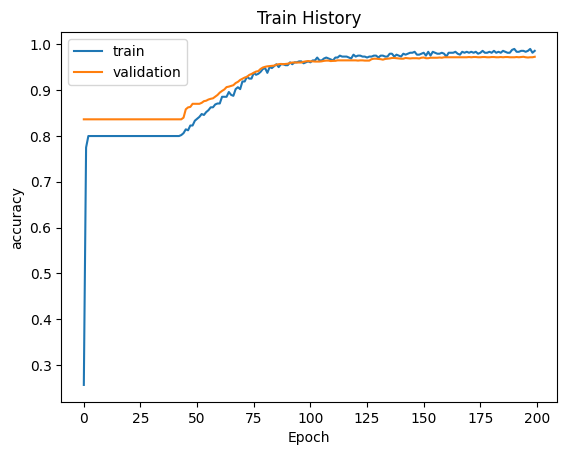

In [16]:

show_train_history(train_history, 'accuracy', 'val_accuracy')

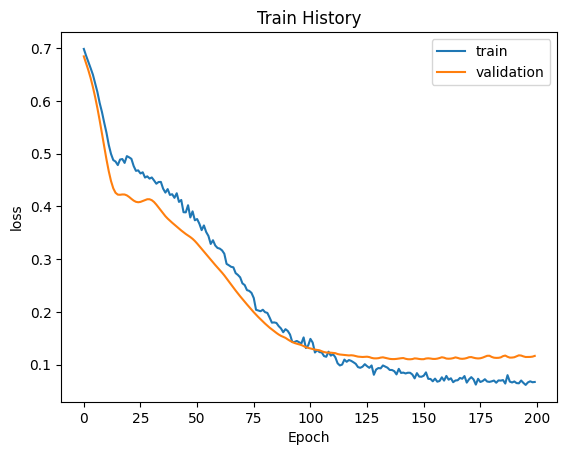

In [17]:
# Print out the loss curves for training and validation sets
show_train_history(train_history, 'loss', 'val_loss')

In [18]:

# Evaluation phase

# Use the testing set to evaluate the model
scores = model.evaluate(test_feature_trans, test_label)

# Print out the accuracy
print('\n')
print('Accuracy=', scores[1])

19/19 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 0.9800


Accuracy= 0.9800000190734863


19/19 [==============================] - 0s 1ms/step
Total number of predictions:  600


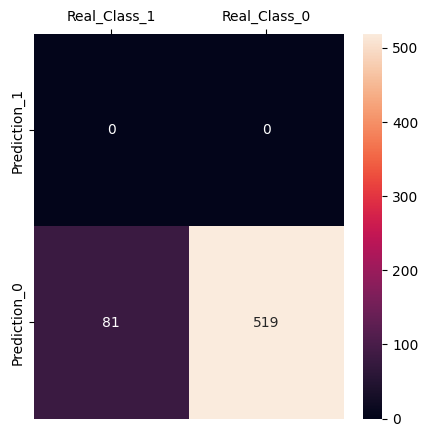

In [19]:
prediction = np.argmax(model.predict(test_feature_trans), axis=1)

df_ans = pd.DataFrame({'Real Class': test_label})
df_ans['Prediction'] = prediction

df_ans['Prediction'].value_counts()

df_ans['Real Class'].value_counts()

cols = ['Real_Class_1', 'Real_Class_0']  # Gold standard
rows = ['Prediction_1', 'Prediction_0']  # Diagnostic tool (our prediction)

B1P1 = len(df_ans[(df_ans['Prediction'] == df_ans['Real Class']) & (df_ans['Real Class'] == 1)])
B1P0 = len(df_ans[(df_ans['Prediction'] != df_ans['Real Class']) & (df_ans['Real Class'] == 1)])
B0P1 = len(df_ans[(df_ans['Prediction'] != df_ans['Real Class']) & (df_ans['Real Class'] == 0)])
B0P0 = len(df_ans[(df_ans['Prediction'] == df_ans['Real Class']) & (df_ans['Real Class'] == 0)])

conf = np.array([[B1P1, B0P1], [B1P0, B0P0]])
df_cm = pd.DataFrame(conf, columns=[i for i in cols], index=[i for i in rows])
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, ax=ax, fmt='d')

# Making x label be on top is common in textbooks.
ax.xaxis.set_ticks_position('top')

print('Total number of predictions: ', np.sum(conf))


In [20]:
# Model summary function
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0] / (conf[0][0] + conf[1][0])
    spe = conf[1][1] / (conf[1][0] + conf[1][1])
    false_positive_rate = conf[0][1] / (conf[0][1] + conf[1][1])
    false_negative_rate = conf[1][0] / (conf[0][0] + conf[1][0])

    print('Total number of test cases: ', total_num)
    print('G = gold standard, P = prediction')
    
    # G = gold standard; P = prediction
    print('G1P1: ', conf[0][0])
    print('G0P1: ', conf[0][1])
    print('G1P0: ', conf[1][0])
    print('G0P0: ', conf[1][1])
    print('--------------------------------------------------')
    print('Sensitivity: ', sen)
    print('Specificity: ', spe)
    print('False_positive_rate: ', false_positive_rate)
    print('False_negative_rate: ', false_negative_rate)


model_efficacy(conf)


Total number of test cases:  600
G = gold standard, P = prediction
G1P1:  0
G0P1:  0
G1P0:  81
G0P0:  519
--------------------------------------------------
Sensitivity:  0.0
Specificity:  0.865
False_positive_rate:  0.0
False_negative_rate:  1.0


##Hyperparamter tuning 
##Optuna

In [21]:
!pip install optuna 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.5 MB/s eta 0:00:00


In [22]:
# import optuna
# import tensorflow as tf
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# def create_model(trial):
#     # define the hyperparameters to optimize
#     num_layers = trial.suggest_int('num_layers', 1, 3)
#     num_units = trial.suggest_int('num_units', 32, 256)
#     learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
#     dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)

#     # create a Sequential model
#     model = tf.keras.Sequential()
#     model.add(Dense(units=200,
#                 input_dim=29,
#                 kernel_initializer='uniform',
#                 activation='relu'))
# # Add Dropout to prevent overfitting
#     model.add(Dropout(0.5))

# # Add the second Dense layer with 200 neuron units and ReLu activation function
#     model.add(Dense(units=200,
#                 kernel_initializer='uniform',
#                 activation='relu'))

# # Add Dropout to prevent overfitting
#     model.add(Dropout(0.5))

# # Add the second Dense layer with 1 neuron units and Sigmoid activation function
#     model.add(Dense(units=1,
#                 kernel_initializer='uniform',
#                 activation='sigmoid'))

#     # add the input layer
#     # model.add(tf.keras.layers.InputLayer(input_shape=(29,)))

#     # add hidden layers
#     # for i in range(num_layers):
#     #     model.add(tf.keras.layers.Dense(units=num_units, activation='relu'))
#     #     model.add(tf.keras.layers.Dropout(dropout_rate))

#     # add the output layer
#     # model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#     # compile the model
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])

#     return model


In [26]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def objective(trial):
    # Define the search space for the hyperparameters
    n_layers = trial.suggest_int('n_layers', 1, 3)
    units = trial.suggest_int('units', 50, 500)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    
    # Construct the model based on the hyperparameters
    model = Sequential()
    for i in range(n_layers):
        model.add(Dense(units=units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compile the model with the selected learning rate
    optimizer = Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # Train the model and return the validation accuracy
    history = model.fit(x=train_feature_trans, y=train_label, validation_split=0.8, epochs=200, batch_size=500, verbose=0)
    return history.history['val_accuracy'][-1]

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the value of the metric to optimize
best_params = study.best_params
best_value = study.best_value
print(f"Best params: {best_params}, Best value: {best_value}")


[I 2023-05-08 20:27:55,069] A new study created in memory with name: no-name-8f55188a-9ea9-4810-b5fe-682c02b2e6de
<ipython-input-27-f5de0d3a571c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-27-f5de0d3a571c>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
[I 2023-05-08 20:28:06,145] Trial 0 finished with value: 0.9614784121513367 and parameters: {'n_layers': 1, 'units': 393, 'dropout_rate': 0.11753980727653213, 'learning_rate': 0.001468878877324392}. Best is trial 0 with value: 0.961478412151336

Best params: {'n_layers': 3, 'units': 382, 'dropout_rate': 0.21992126546767482, 'learning_rate': 0.007985041750818492}, Best value: 0.9729307889938354


In [28]:
import optuna.visualization as viz

# Plot the optimization history
fig_opt = viz.plot_optimization_history(study)
fig_opt.show()

# Plot the importance of the hyperparameters
fig_importance = viz.plot_param_importances(study)
fig_importance.show()


In [31]:
!pip install optuna-dashboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 13.9 MB/s eta 0:00:00


In [36]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)


In [37]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study)


In [39]:
# def objective(trial):
#     # create the model
#     model = create_model(trial)

#     # train the model
#     history = model.fit(train_feature_trans, epochs=10, validation_data=train_label)

#     # evaluate the model on the testing set and return the metric to optimize
#     return history.history['val_accuracy'][-1]




In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# print the best hyperparameters and the value of the metric to optimize
best_params = study.best_params
best_value = study.best_value
print(f"Best params: {best_params}, Best value: {best_value}")


In [ ]:
# create the model with the best hyperparameters
best_model = create_model(study.best_params)

# train the model on the entire training set
history = best_model.fit(train_ds, epochs=10, validation_data=test_ds)

# plot the accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history
